In [1]:
# kaggle competition by Matthias and MAtteo

In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## -------------------------------------sk learn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [201]:
path="data/features_train.csv"
x_train_raw=pd.read_csv(path)

path = "data/target_train.csv"
y_train_raw = pd.read_csv(path)

path="data/features_test.csv"
x_test = pd.read_csv(path)

In [202]:
class_count_train={}

for i in y_train['Expected'].unique():
    count = sum(y_train['Expected']==i)
    print(f"{i} class: {count} \n")
    class_count_train[i]=count
class_count_train.values()

0 class: 3341 

2 class: 3365 

1 class: 3294 



dict_values([3341, 3365, 3294])

In [34]:
x_train_raw.head()

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


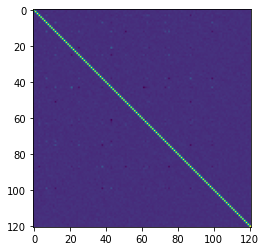

In [37]:
cor_mat= x_train_raw.corr()
plt.imshow(cor_mat)

In [46]:
cor_mat2.iloc[:,-1].shape

(122,)

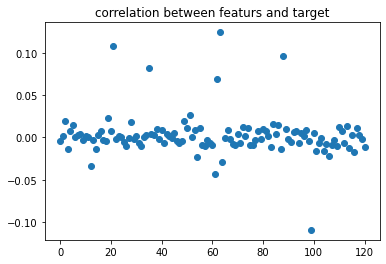

In [203]:
# correlation between target and predictors

merged=x_train_raw.copy()
merged['y']=y_train['Expected']
cor_mat2=merged.corr()

fig, axs=plt.subplots()
axs.scatter(x=range(0,121), y=cor_mat2.iloc[:-1,-1])
axs.set_title("correlation between featurs and target")
None

In [204]:
l.to_list()


AttributeError: 'list' object has no attribute 'to_list'

In [193]:
sel_cor = cor_mat2.iloc[:-1,-1].abs().sort_values()
l=sorted(sel_cor[sel_cor>0.05].index.to_list())

print(f" the features with correlation higher than 0.05 are \n {l}")


 the features with correlation higher than 0.05 are 
 ['20', '34', '61', '62', '87', '98']


In [ ]:
def check_cat_variables(cat, y, cat_type="cat"):
    """ function that returns a stacked bar plot(matplotlib) or a boxplot if 'cat' is continuous, 
    requires matplotlib.pyplot as plt and seaborn as sns"""
    fig, ax=plt.subplots()
    if type(cat) is object or cat_type == "cat":
        x_= y
        y_= cat
        g= sns.boxplot(x_, y_, ax=ax)
        return ax
    

check_cat_variables(y_train['Expected'], x_train_raw['60'])

In [ ]:
fig,ax=plt.subplots()
col='60'

bin_size=np.ceil((max(x_train_raw[col])-min(x_train_raw[col]))/10)
bin_size

In [123]:
bins=[round(min(x_train_raw[col])+i) for i in list(range(11)*bin_size)]
bins

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150]

In [175]:
col='60'
def target_by_col(col):
    fig,axs=plt.subplots(ncols=3, nrows=1, sharey=True)
    for i in range(3):
        count=[]
        for bin in bins:
            count.append(merged[(merged['y']==i) & (merged[col]<=bin)]['y'].count())
        sns.histplot(x=bins,y=count, hue=i, ax=axs[i])
    fig.suptitle(f"column {col}", fontsize=20)

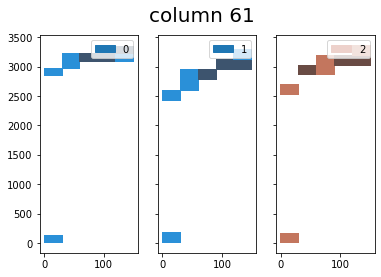

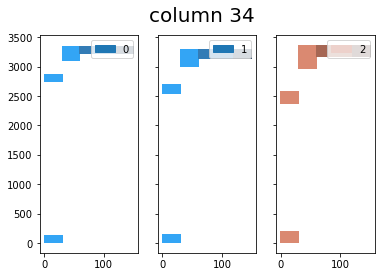

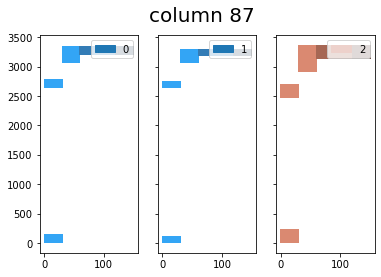

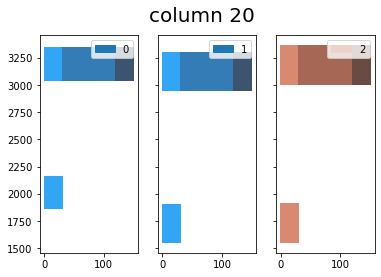

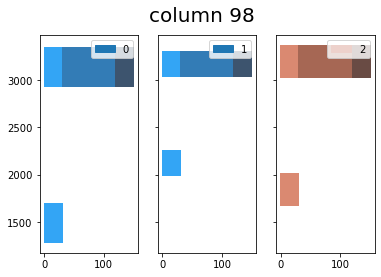

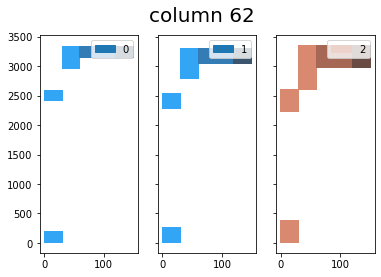

In [176]:
for i in l:
    target_by_col(i)

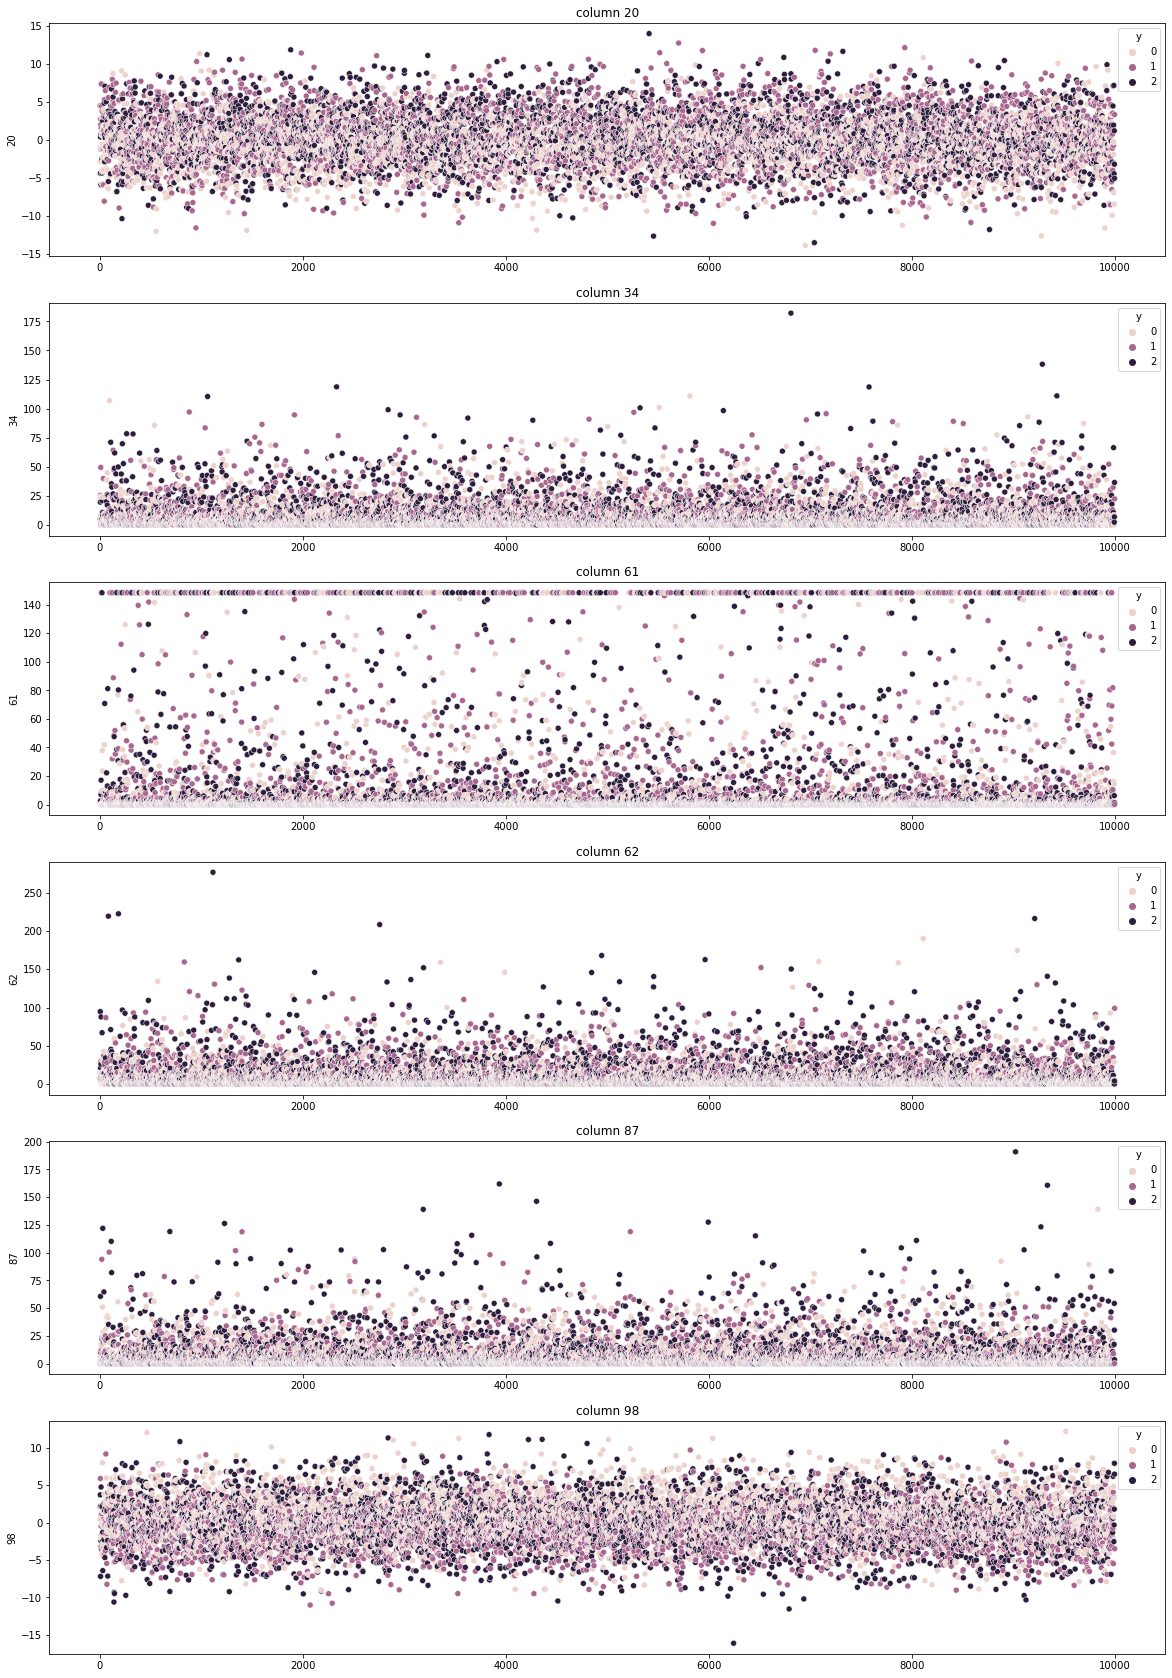

In [352]:
fig, ax= plt.subplots(nrows=len(l), ncols=1, figsize=[20,30])
pal= ["blue", "yellow", "red"]
counter=0
for col in l:
    temp_df=merged[[col, 'y']]
    sns.scatterplot(x= range(len(temp_df)), y= temp_df[col], ax=ax[counter], hue=temp_df['y'] )
    ax[counter].set_title(f"column {col}")
    counter=counter+1

In [273]:
x_sel=x_train_raw[l]

In [337]:
X_train, x_valid, Y_train, y_valid= train_test_split(x_train_raw[l], y_train_raw['Expected'], test_size=0.2, random_state=11)


In [338]:
# transform columns
tr=PowerTransformer(method='box-cox')
X_train_trans = MinMaxScaler().fit_transform(X_train)+0.0000000001


X_train_trans2 = PowerTransformer(method='box-cox').fit_transform(X_train_trans)
X_train_trans3 = StandardScaler().fit_transform(X_train_trans2)


In [344]:
# functions to run parameter optimisation
def rd_optimise_model(model, params_dic, metric):
    pipe=make_pipeline(model)
    gs = RandomizedSearchCV(pipe, params_dic, scoring=metric, n_iter=10, n_jobs=-1, cv=5)
    gs.fit(X_train_trans3,Y_train)
    return gs

def grid_optimise_model(model, params_dic, metric):
    pipe=make_pipeline(ct, model)
    gs = GridSearchCV(pipe, params_dic, scoring=metric, n_jobs=4, cv=5)
    gs.fit(x_train,y_train)
    return gs

In [ ]:
# to do not working

model=LogisticRegressionCV(
Cs=np.linspace(0,1,20),
l1_ratios=np.linspace(0.0001, 1, 10),
    cv=10,
n_jobs=-1,
penalty='elasticnet',
scoring="macro_f1",
    solver='saga'
)

model.fit(X_train_trans3, Y_train)

In [ ]:

 # searching for random forest parameters
RF = RandomForestClassifier()
params_dic={"randomforestclassifier__max_depth" : np.linspace(5,50,20).astype(int),
            "randomforestclassifier__min_samples_split" : np.linspace(0.1,0.9,20),
            "randomforestclassifier__max_leaf_nodes" : np.linspace(2,50,10).astype(int),
            "randomforestclassifier__min_samples_leaf":np.linspace(10,30,10).astype(int),
            "randomforestclassifier__n_estimators" :np.linspace(1,200, 50).astype(int),
            "randomforestclassifier__max_features" : np.linspace(1,18, 18).astype(int)
           }

rd_RF=rd_optimise_model(RF,params_dic, 'f1_macro')

rd_RF.best_params_, rd_RF.best_score_

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       667
           1       0.42      0.57      0.48       656
           2       0.44      0.22      0.30       677

    accuracy                           0.44      2000
   macro avg       0.44      0.44      0.42      2000
weighted avg       0.44      0.44      0.42      2000



<AxesSubplot:>

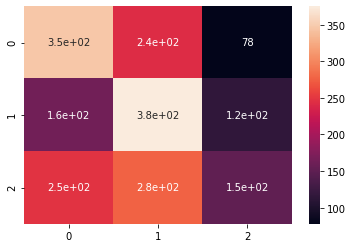

In [350]:
best_model= RandomForestClassifier(n_estimators=167, 
                                   min_samples_split=0.226315,
                                   min_samples_leaf=12, 
                                   max_leaf_nodes=23, 
                                   max_features=4, max_depth=19)
best_model.fit(X_train,Y_train)
y_pred = best_model.predict(x_valid)
print(classification_report(y_valid, y_pred))
cm= confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
len(best_model.feature_importances_)

In [347]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
# random search
params_dic = {
    'adaboostclassifier__n_estimators' : np.linspace(5,50,20).astype(int),
    'adaboostclassifier__learning_rate' : np.linspace(0.1,1.0,20),
    'adaboostclassifier__algorithm' : ['SAMME','SAMME.R'],
             }
# random_search
rd_ADA=rd_optimise_model(ADA, params_dic, 'f1_macro')

rd_ADA.best_params_, rd_ADA.best_score_

({'adaboostclassifier__n_estimators': 50,
  'adaboostclassifier__learning_rate': 0.6684210526315789,
  'adaboostclassifier__algorithm': 'SAMME.R'},
 0.4372012148549909)

In [348]:
# test ADABOOST

model = AdaBoostClassifier(
n_estimators = 42,
learning_rate = 0.5736,
algorithm = 'SAMME.R',
)

model.fit(X_train,Y_train)
ADA_pred = model.predict(x_valid)
print(classification_report(y_valid,ADA_pred))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       667
           1       0.43      0.52      0.47       656
           2       0.46      0.32      0.38       677

    accuracy                           0.45      2000
   macro avg       0.45      0.45      0.45      2000
weighted avg       0.45      0.45      0.44      2000

